In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Constants_and_functions as C

In [2]:
pd.options.display.max_rows = 7000 # number of displayed rows

# Temperature
T = pd.read_csv('HATPRO_temp.csv', sep=';', comment='#', header=0, names = C.Z, index_col=0, date_parser=pd.to_datetime) 
#T = T['2019-05-23 00:00:00':'2019-05-23 09:00:00']

# Humidity
a = pd.read_csv('HATPRO_humidity.csv', sep=';', comment='#', header=0, names = C.Z, index_col=0, date_parser=pd.to_datetime) 
a = a*10**(-3) # to get kg/m^-3
#a = a['2019-05-23 00:00:00':'2019-05-23 09:00:00']


# get data for initial pressure data
DATA = pd.read_csv('TAWES_UIBK_Ertel.csv', sep= '\\t', header = None, engine='python', index_col=0) # first row was deleted

#skip "
b = np.array(DATA.index)
for i in np.arange(0,len(b)):
   b[i]= b[i][1:]
DATA.index = pd.to_datetime(b)
DATA = DATA.iloc[::-1]
DATA = DATA[:'2019-05-24 15:10:00']
DATA

,1,2,3,4,5,6,7,8,9,10,11,12
2019-05-23 00:00:00,107,88,88,88,36,13,45,19,9496,10210,0,"-999"""
2019-05-23 00:10:00,108,87,89,87,7,8,356,17,9496,10210,0,"0"""
2019-05-23 00:20:00,109,88,88,87,355,6,16,16,9496,10209,0,"0"""
2019-05-23 00:30:00,108,86,86,86,291,11,310,16,9496,10210,0,"-999"""
2019-05-23 00:40:00,108,84,83,85,301,6,306,17,9496,10210,0,"0"""
2019-05-23 00:50:00,107,81,82,84,80,9,107,29,9496,10210,0,"0"""
2019-05-23 01:00:00,108,82,81,84,73,12,69,26,9495,10209,0,"0"""
2019-05-23 01:10:00,108,80,80,83,65,12,43,25,9495,10209,0,"-999"""
2019-05-23 01:20:00,108,79,79,82,41,14,45,33,9493,10207,0,"-999"""
2019-05-23 01:30:00,108,80,80,83,49,15,47,26,9493,10207,0,"-999"""


In [3]:
# water vapour pressure
e = C.e(T,a) 

In [4]:
# pressure of dry air
p_d = pd.DataFrame(index = T.index, columns = T.columns)
p_d[0] = np.array(DATA[9])*10
for i in np.arange(1, len(p_d.columns)):
    p_d.iloc[:,i] = C.p_z2( p_d.iloc[:,i-1], p_d.columns[i-1], p_d.columns[i], T.iloc[:,i-1])
p_d

,0,10,30,50,75,100,125,150,200,250,...,3500,3900,4400,5000,5600,6200,7000,8000,9000,10000
2019-05-23 00:00:00,94960,94845.822620,94617.863518,94390.364327,94106.619729,93823.548845,93541.140557,93259.433473,92698.245939,92139.825837,...,61422.246378,58342.183601,54678.758353,50538.934798,46655.951862,43014.309022,38521.882786,33444.145973,28897.450335,24847.978557
2019-05-23 00:10:00,94960,94845.794498,94617.779349,94390.224336,94106.400283,93823.220412,93540.653862,93258.759485,92697.140975,92138.274457,...,61437.382087,58357.012127,54692.251969,50550.184124,46663.863127,43017.997111,38518.834087,33434.256310,28881.132090,24826.148509
2019-05-23 00:20:00,94960,94845.846713,94617.895568,94390.348281,94106.503879,93823.283803,93540.697143,93258.772809,92697.134428,92138.228517,...,61422.833539,58345.675009,54683.913369,50545.684510,46664.217652,43022.899190,38529.575795,33453.560857,28909.013433,24863.053581
2019-05-23 00:30:00,94960,94845.762343,94617.667057,94390.000185,94106.016920,93822.668579,93539.954233,93257.902814,92696.012276,92136.817215,...,61431.073740,58353.953294,54692.478565,50556.042368,46676.393528,43037.446074,38546.886826,33469.763440,28925.538888,24881.232966
2019-05-23 00:40:00,94960,94845.738214,94617.586804,94389.839963,94105.757162,93822.329710,93539.556557,93257.476477,92695.568698,92136.494716,...,61399.738919,58319.562402,54655.269699,50516.308200,46635.644913,42995.863990,38506.563182,33434.750941,28896.359772,24858.771139
2019-05-23 00:50:00,94960,94845.750280,94617.614896,94389.908075,94105.895090,93822.537131,93539.823180,93257.792061,92695.941805,92136.845842,...,61419.780417,58337.920185,54670.856831,50526.432232,46639.170075,42993.150994,38495.211689,33412.184357,28863.513132,24820.286070
2019-05-23 01:00:00,94950,94835.846690,94607.887522,94380.292245,94096.328190,93812.939125,93530.144403,93247.983175,92685.815487,92126.346225,...,61399.450931,58320.192514,54657.071823,50520.569100,46641.901803,43004.123061,38516.869713,33447.405374,28910.354032,24872.951530
2019-05-23 01:10:00,94950,94835.814560,94607.799348,94380.164230,94096.170564,93812.771985,93529.977767,93247.836963,92685.729642,92126.399182,...,61393.164433,58311.622123,54646.750824,50506.448023,46623.052983,42981.068826,38489.543600,33415.678876,28875.917378,24836.735415
2019-05-23 01:20:00,94930,94815.858691,94587.915509,94360.328234,94076.394255,93793.045251,93510.280574,93228.159352,92666.111177,92106.820114,...,61390.596698,58312.685327,54650.843353,50514.506887,46636.450107,42999.096563,38510.485536,33438.546903,28899.820395,24862.077711
2019-05-23 01:30:00,94930,94815.818526,94587.827335,94360.248282,94076.364525,93793.085503,93510.400489,93228.348611,92666.358768,92106.967437,...,61386.597654,58306.515445,54643.715553,50507.003057,46628.361445,42990.255970,38501.540709,33427.657319,28886.628800,24848.422684


In [5]:
# mixing ratio
w = C.w(e,p_d)

In [6]:
# virtual Temperature
Tv = C.Tv(T,w)

In [7]:
# pressure
p = pd.DataFrame(index = T.index, columns = T.columns)
p[0] = np.array(DATA[10])*10
#p[0] = DATA['p']*10**2 # initial condition # problem in pressure Data
for i in np.arange(1, len(p.columns)):
    p.iloc[:,i] = C.p_z2(p.iloc[:,i-1], p.columns[i-1], p.columns[i], Tv.iloc[:,i-1])

In [8]:
# potential Temperature
theta = C.Theta(T,p)

In [9]:
# Gradient of potential Temperature
Gradient = pd.DataFrame(index = T.index, columns = T.columns)
for i in np.arange(0, len(theta.columns)-1):
    Gradient.iloc[:,i] = (theta.iloc[:, i+1]- theta.iloc[:, i])/(theta.columns[i+1]-theta.columns[i])

In [25]:
def Plot_theta(index):
    plt.plot(theta.loc[index], theta.columns)
    plt.xlabel('Potential Temperature in K')
    plt.ylabel('Height in m')
   

def Plot_Gradient(index):
    plt.plot(Gradient.loc[index], Gradient.columns)
    plt.xlabel('Gradient of Potential Temperature in K')
    plt.ylabel('Height in m')
    plt.ylim(0,250)


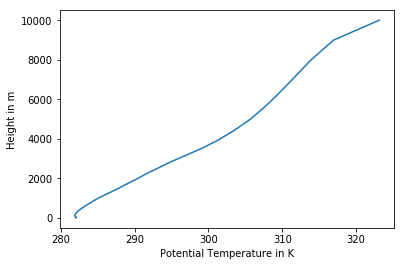

In [27]:
Plot_theta('2019-05-23 05:20:00')

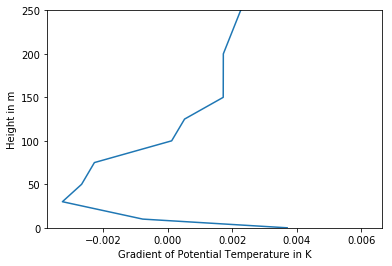

In [23]:
Plot_Gradient('2019-05-23 05:20:00')